In [1]:
from cuml import accel
accel.install()
accel.enabled()

True

In [3]:
%matplotlib inline 


# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
import sklearn; print(f'Scikit-Learn version: {sklearn.__version__}')
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    RandomizedSearchCV,
    GridSearchCV
)
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    RocCurveDisplay
)

from sklearn.preprocessing import StandardScaler


Scikit-Learn version: 1.7.2


## Features
1. **age** - age in years
2. **sex** - (1 = male; 0 = female)
3. **cp** - chest pain type:
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. **trestbps** - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. **chol** - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. **restecg** - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. **thalach** - maximum heart rate achieved
9. **exang** - exercise induced angina (1 = yes; 0 = no)
10. **oldpeak** - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. **slope** - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. **ca** - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. **thal** - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising

## Targets

1. **target** - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Classification-specific steps

* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

In [4]:
df = pd.read_csv('./heart-disease.csv')
df.shape

(303, 14)

## Exploratory Data Analysis

* What question(s) are you trying to solve?
* What kind of data do we have and how do we treat different types?
* What's missing from the data and how do you deal with it?
* Where are the outliers and why should you care about them?
* How can you add, change or remove features to get more out of your data?


In [5]:
df['target'].value_counts();

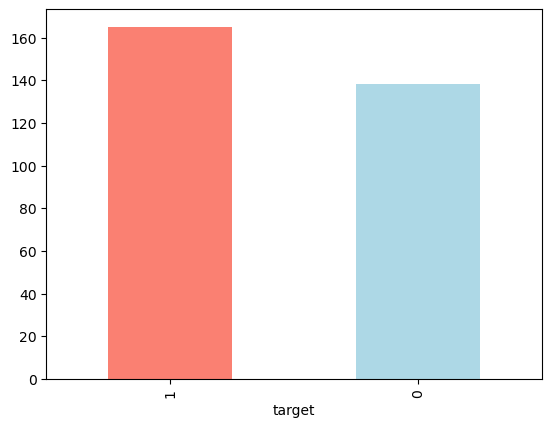

In [6]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [7]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


sex
1    207
0     96
Name: count, dtype: int64


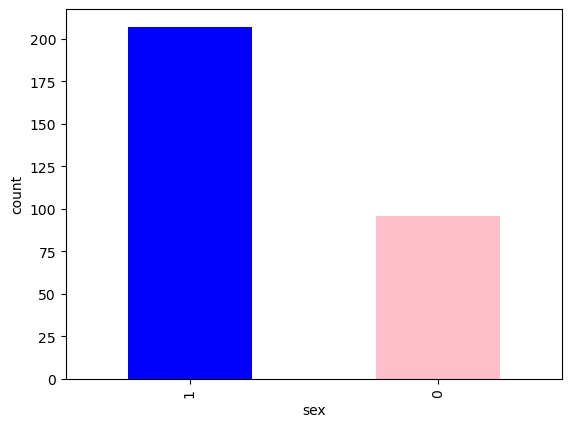

In [10]:
print(df['sex'].value_counts())
df['sex'].value_counts().plot(kind='bar', color=['blue', 'pink'], ylabel='count');

### Heart disease according to sex

In [11]:
pd.crosstab(df['target'], df['sex']) # 75 women out of 100 (72 out of 96) and about 50% (114 out of 207) of males have heart disease IN THIS DATASET

sex,0,1
target,,
0,24,114
1,72,93


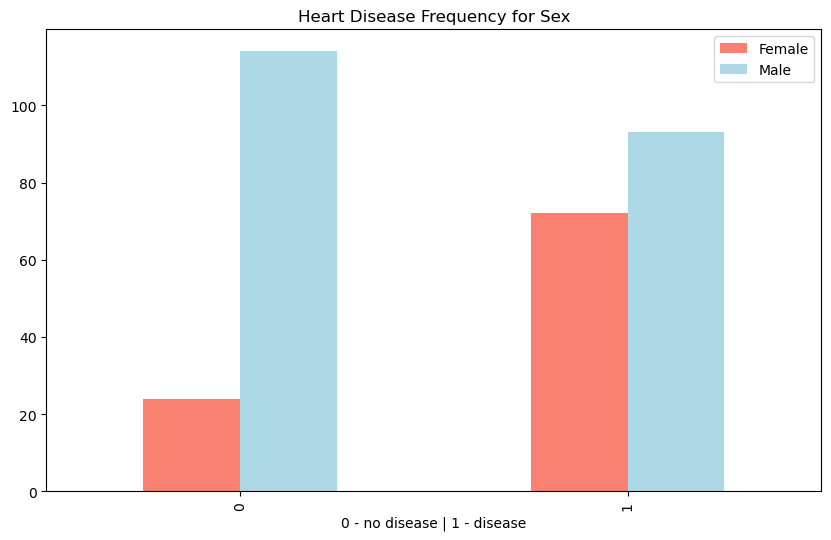

In [12]:
pd.crosstab(df['target'], df['sex']).plot(
    kind='bar',
    figsize=(10, 6),
    color=['salmon', 'lightblue'],
    title='Heart Disease Frequency for Sex',
    xlabel='0 - no disease | 1 - disease',
    legend=True    
);
plt.legend(['Female', 'Male']);

## Heart disease according to age and max heart rate (`thalach`)

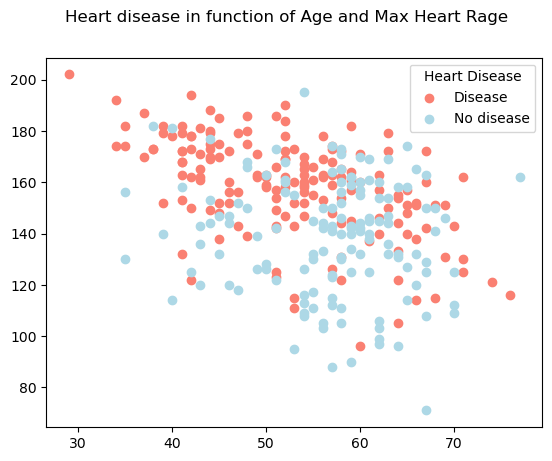

In [13]:
fig, ax = plt.subplots();

fig.suptitle('Heart disease in function of Age and Max Heart Rage')

scatter_disease = ax.scatter(
    df.age[df.target == 1], # only visualize people with a heart disease
    df.thalach[df.target == 1],
    c='salmon'
);

scatter_no_disease = ax.scatter(
    df.age[df.target == 0], # only visualize people with a heart disease
    df.thalach[df.target == 0],
    c='lightblue'
);

ax.legend(['Disease', 'No disease'], title='Heart Disease');

It would seem that having a high max heart rate in younger people is more associated with a heart disease

## Age distribution

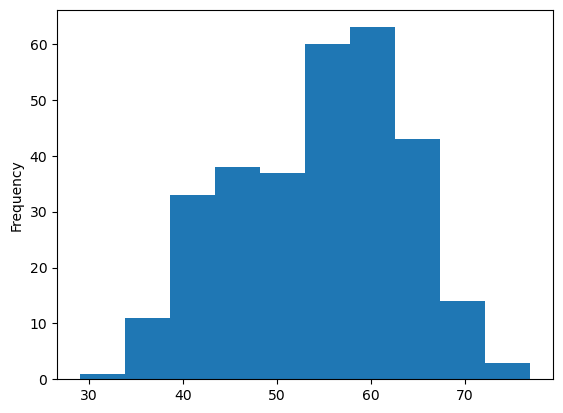

In [14]:
df['age'].plot(kind='hist');

## Heart Disease frequency compared to Chest Pain (`cp`)

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [16]:
for n in range(20):
    plt.close()

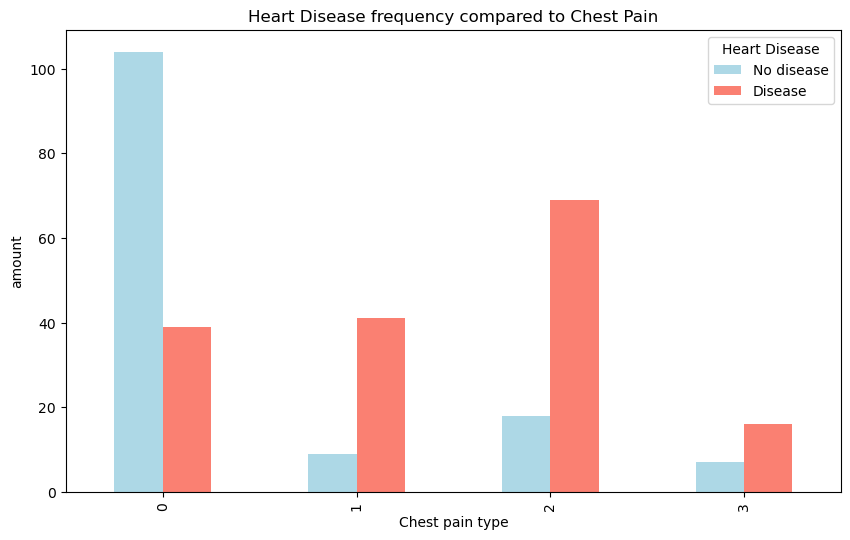

In [17]:
pd.crosstab(df.cp, df.target).plot(
    kind='bar',
    figsize=(10, 6),
    color=['lightblue', 'salmon'], # inverted since arguments to crosstab() are inverted
    title='Heart Disease frequency compared to Chest Pain',
    xlabel='Chest pain type',
    ylabel='amount',
    legend=True  
);

plt.legend(['No disease', 'Disease'], title='Heart Disease');

In [18]:
correlation_matrix = df.corr()
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

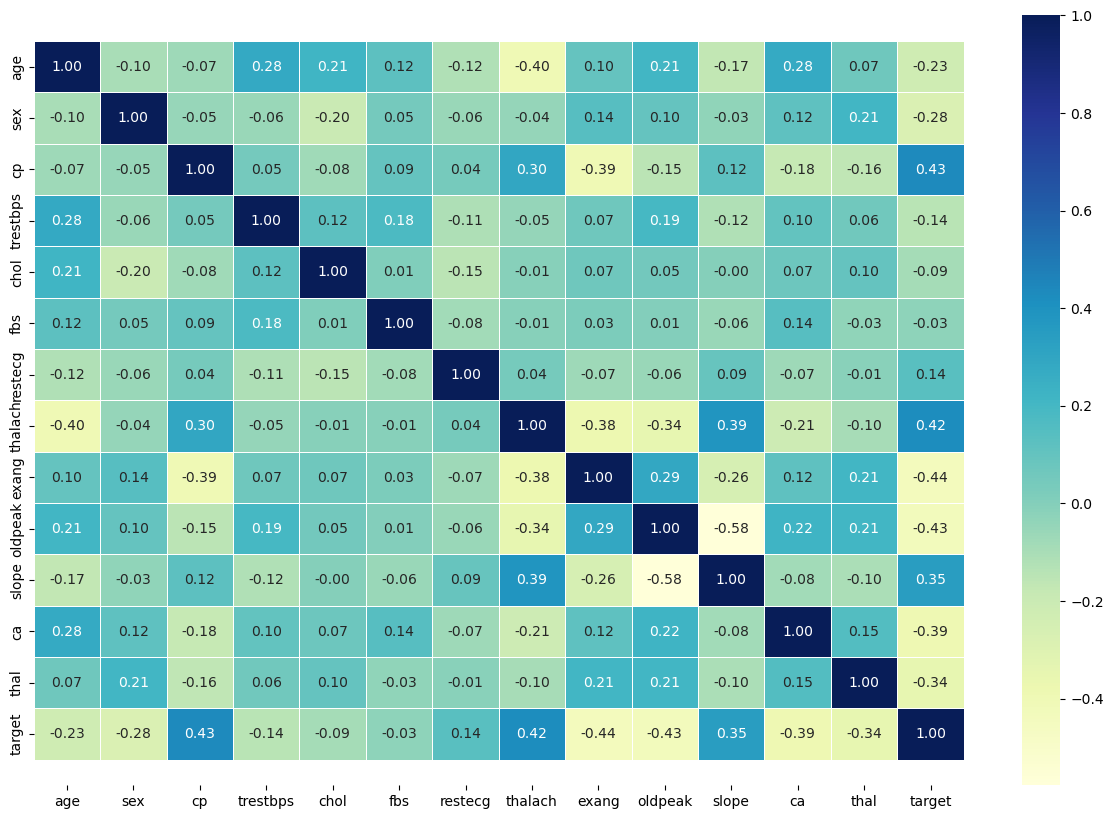

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [20]:
correlation_matrix['trestbps']['target'] # Shows how correlated 2 columns are, max is 1 (positive correlation)

np.float64(-0.14493112849775)

## Modelling

In [21]:
np.random.seed(0)

# df = df.sample(frac=1)

X = df.drop('target', axis=1)
y = df.target

X.shape, y.shape

((303, 13), (303,))

In [22]:
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Models to try

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [23]:
models = {
    'logistic_regression': LogisticRegression(max_iter=1000),
    'knn': KNeighborsClassifier(),
    'random_forest': RandomForestClassifier()
}

In [24]:
def fit_n_score(models, X_train, X_test, y_train, y_test):
    """
    Iterates over provided models, fits and scores them.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    np.random.seed(0)

    model_scores = {}

    for name, model in models.items():
        # Fit
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [25]:
scores = fit_n_score(models, X_train, X_test, y_train, y_test)
scores

{'logistic_regression': 0.8524590163934426,
 'knn': 0.639344262295082,
 'random_forest': 0.8852459192276001}

In [26]:
scores_df = pd.DataFrame(scores, index=['accuracy']) # Accuracy is the default scoring method for classification
print(scores_df)
scores_df = scores_df.T
scores_df

          logistic_regression       knn  random_forest
accuracy             0.852459  0.639344       0.885246


,accuracy
logistic_regression,0.852459
knn,0.639344
random_forest,0.885246


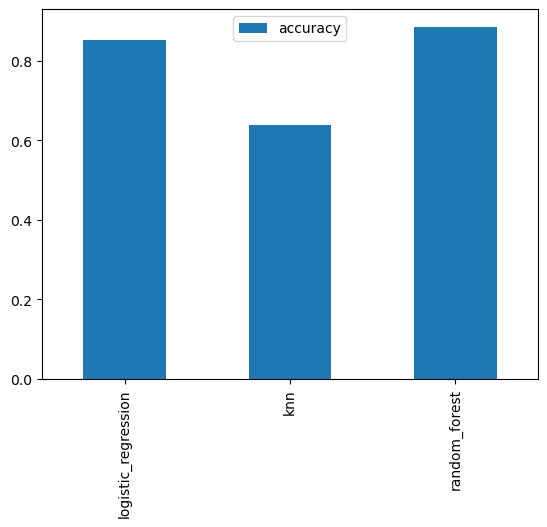

In [27]:
scores_df.plot.bar();

## Hyperparameters tuning with RandomizedSearchCV

### KNN Tuning

In [28]:
knn_train_scores = []
knn_test_scores = []

knn_n_neighbors = range(1, 21)
knn = KNeighborsClassifier()

for i in knn_n_neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)

    knn_train_scores.append(knn.score(X_train, y_train))   # Must be 1 for the model to be considered reliable
    knn_test_scores.append(knn.score(X_test, y_test))



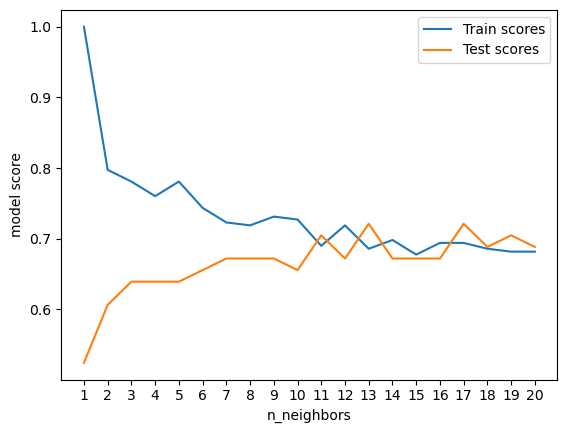

In [29]:
knn_scores_fig, knn_scores_ax = plt.subplots();

knn_scores_ax.plot(knn_n_neighbors, knn_train_scores, label='Train scores');
knn_scores_ax.set_xlabel('n_neighbors')
knn_scores_ax.set_ylabel('model score')
knn_scores_ax.set_xticks(np.arange(1, 21, 1))
knn_scores_ax.set_yticks(np.arange(0, 1.1, 0.1))
knn_scores_ax.plot(knn_n_neighbors, knn_test_scores, label='Test scores');
knn_scores_ax.legend();

In [30]:
knn_test_max = max(knn_test_scores)
knn_test_max_index = knn_test_scores.index(knn_test_max)
knn_train_at_max = knn_train_scores[knn_test_max_index]

knn_train_max = max(knn_train_scores)
knn_train_max_index = knn_train_scores.index(knn_train_max)
knn_test_at_max = knn_test_scores[knn_train_max_index]

print(f'Max KNN score on test data is {knn_test_max}, with an associated training data score of {knn_train_at_max}')
print(f'KNN score on test data is {knn_test_at_max} at max training score {knn_train_max}')

Max KNN score on test data is 0.7213114754098361, with an associated training data score of 0.6859504132231405
KNN score on test data is 0.5245901639344263 at max training score 1.0


### Logistic Regression Tuning

In [31]:
np.random.seed(0)

# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[2025-09-24 15:41:14.066] [CUML] [warning] L-BFGS: max iterations reached
[2025-09-24 15:41:14.067] [CUML] [warning] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[2025-09-24 15:41:14.103] [CUML] [warning] L-BFGS: max iterations reached
[2025-09-24 15:41:14.103] [CUML] [warning] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[2025-09-24 15:41:14.140] [CUML] [warning] L-BFGS: max iterations reached
[2025-09-24 15:41:14.140] [CUML] [warning] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[2025-09-24 15:41:14.179] [CUML] [warning] L-BFGS: max i

,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(78.47599703514607)}

In [33]:
rs_log_reg.score(X_test, y_test)

0.8688524590163934

### Random Forest Classifier Tuning

In [34]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 100),
           "max_depth": [None, 1, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [35]:
np.random.seed(0)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=2)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=710; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=710; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=710; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=710; total time=   0.3s
[CV] END max_depth=5, min

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 1, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, 1...10, 810, 910])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [36]:
rs_rf.best_params_

{'n_estimators': np.int64(510),
 'min_samples_split': np.int64(16),
 'min_samples_leaf': np.int64(15),
 'max_depth': None}

In [37]:
rs_rf.score(X_test, y_test)

0.868852436542511

## Hyperparameters tuning with GridSearchCV (Logistic Regression and Random Forest only)

### Logistic Regression

In [38]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=2)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[2025-09-24 15:41:40.961] [CUML] [warning] L-BFGS: max iterations reached
[2025-09-24 15:41:40.961] [CUML] [warning] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[2025-09-24 15:41:41.021] [CUML] [warning] L-BFGS: max iterations reached
[20

In [39]:
gs_log_reg.best_params_

{'C': np.float64(221.22162910704503), 'solver': 'liblinear'}

In [40]:
gs_log_reg.score(X_test, y_test)


0.8524590163934426

In [41]:
scores

{'logistic_regression': 0.8524590163934426,
 'knn': 0.639344262295082,
 'random_forest': 0.8852459192276001}

### Random Forest

In [42]:
# {                                                 # 8820 fits
#     'n_estimators': np.arange(100, 1500, 100),
#     'max_depth': [None, 1, 2, 5, 10, 20, 30],
#     'max_features': ["log2", "sqrt"],
#     'min_samples_split': [2, 4, 6],
#     'min_samples_leaf': [1, 2, 4]
# } = {'max_depth': 5,
#  'max_features': 'log2',
#  'min_samples_leaf': 4,
#  'min_samples_split': 2,
#  'n_estimators': np.int64(500)}

In [43]:
rf_grid = {
    'n_estimators': [105],
    'max_depth': [1, 2, 3, 4, 6],
    'max_features': ["sqrt"],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [3]
}

top_grid = {       # With these parameters (max_depth=None) I get 0.8852459192276001 (best score)
# If I set max_depth to [None, 1] it selects as best max_depth=1 with a score of 0.8524590134620667 :/
 'max_depth': [None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': [100],
 'n_jobs': [None],
}



gs_rf = GridSearchCV(
    RandomForestClassifier(),
    param_grid=top_grid,
    cv=5,
    verbose=2
)

gs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=None; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=None; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=None; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=None; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=None; total time=   0.1s


In [44]:
gs_rf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'n_jobs': None}

In [45]:
gs_rf.score(X_test, y_test)

0.8852459192276001

In [46]:
scores

{'logistic_regression': 0.8524590163934426,
 'knn': 0.639344262295082,
 'random_forest': 0.8852459192276001}

## Evaluation

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score


In [47]:
y_preds = models['random_forest'].predict(X_test)

### ROC Curve

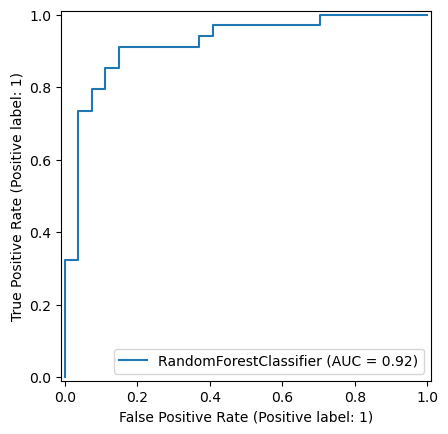

In [48]:
roc_curve = RocCurveDisplay.from_estimator(models['random_forest'], X_test, y_test)

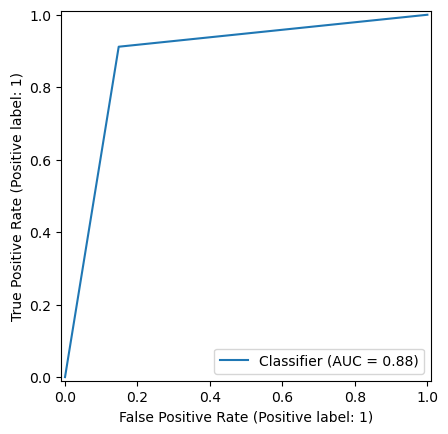

In [49]:
# But ...
RocCurveDisplay.from_predictions(y_test, y_preds)

### Confusion matrix

In [50]:
sns.set(font_scale=1.5)

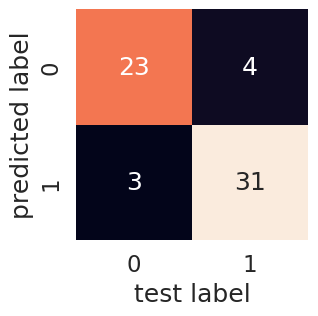

In [51]:
def plot_conf_matrix(y_test, y_pred):
    cmat_fig, cmat_ax = plt.subplots(figsize=(3, 3))
    cmat_ax = sns.heatmap(
        confusion_matrix(y_true=y_test, y_pred=y_pred),
        annot=True,
        cbar=False
    )
    cmat_ax.set_xlabel('test label')
    cmat_ax.set_ylabel('predicted label')
    return cmat_fig

_ = plot_conf_matrix(y_test, y_preds)

### Cross-validated Classification Report

In [52]:
print(classification_report(y_test, y_preds)) # shows that 0s (27) and 1s (34) are equally represented in the target

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [53]:
winner = RandomForestClassifier(**gs_rf.best_params_)

In [54]:
cv_accuracy = cross_val_score(winner, X, y, cv=10, scoring='accuracy')
cv_accuracy = np.mean(cv_accuracy)

In [55]:
cv_precision = cross_val_score(winner, X, y, cv=10, scoring='precision')
cv_precision = np.mean(cv_precision)

In [56]:
cv_recall = cross_val_score(winner, X, y, cv=10, scoring='recall')
cv_recall = np.mean(cv_recall)

In [57]:
cv_f1 = cross_val_score(winner, X, y, cv=10, scoring='f1')   # 'f1' for binary targets (https://scikit-learn.org/stable/modules/model_evaluation.html#string-name-scorers)
cv_f1 = np.mean(cv_f1)

In [58]:
cv_scores = {
    'accuracy': cv_accuracy,
    'precision': cv_precision,
    'recall': cv_recall,
    'f1': cv_f1
}

In [59]:
cv_metrics = pd.DataFrame(
    index=['score'],
    data=cv_scores)

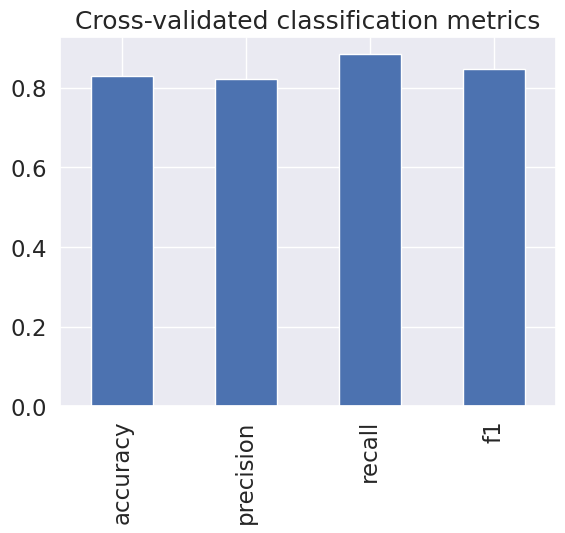

In [60]:
p = cv_metrics.T.plot.bar(
    title='Cross-validated classification metrics',
    legend=False
);


## Feature importance

How much every feature contributed to predicting the target.

In [61]:
df = df.sample(frac=1.0)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.feature_importances_

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

## Feature Scaling

In [63]:
scaler = StandardScaler()

In [64]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [65]:
rf = RandomForestClassifier(**gs_rf.best_params_)

In [66]:
rf.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [67]:
rf.score(X_test_scaled, y_test)

0.8852459192276001

In [68]:
'No benefits in scaling'

'No benefits in scaling'